<center>
    <h1>Outlier Detection using Standard Deviation and Z-Score</h1>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<b>Dataset Link: https://www.kaggle.com/datasets/mustafaali96/weight-height</b>

In [2]:
data = pd.read_csv("weight-height.csv", usecols = ["Gender", "Height"])
data.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
data.shape

(10000, 2)

In [4]:
data.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


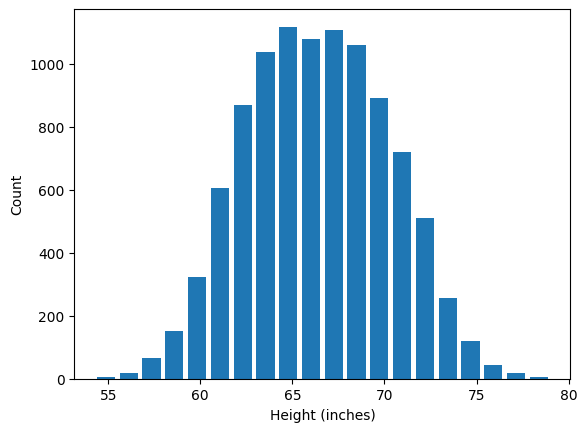

In [5]:
plt.hist(data["Height"], bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

<b>Useful Article: https://www.mathsisfun.com/data/standard-normal-distribution.html</b>

In [6]:
data["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Outlier Removal using Standard Deviation
One of the most common ways to remove the outliers is to eliminate all the data points that fall above 3 standard deviations.

In [7]:
standard_deviation = data["Height"].std()
mean = data["Height"].mean()

mean, standard_deviation

(66.36755975482124, 3.8475281207732293)

In [8]:
UPPER_LIMIT = mean + (3*standard_deviation)
LOWER_LIMIT = mean - (3*standard_deviation)
print("Upper Limit:", UPPER_LIMIT)
print("Lower Limit:", LOWER_LIMIT)

Upper Limit: 77.91014411714093
Lower Limit: 54.82497539250156


In [9]:
mask = (data["Height"]<LOWER_LIMIT) | (data["Height"]>UPPER_LIMIT)
data[mask]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [10]:
data[mask].shape

(7, 2)

In [11]:
mask = (data["Height"]>=LOWER_LIMIT) & (data["Height"]<=UPPER_LIMIT)
new_df = data[mask]

In [12]:
data.shape

(10000, 2)

In [13]:
new_df.shape

(9993, 2)

## Outlier Removal using Z-Score

<b>Z-Score: </b>Z-Score is a value that tells us, how many standard deviations is the data point away from the mean.
<img src="https://miro.medium.com/max/564/0*zsPSyjpTtPOmKUQy.png" />

In [14]:
def z_score(df, column):
    x = df[column].values
    mean = df[column].mean()
    standard_deviation = df[column].std()
    return (x-mean) / standard_deviation

In [15]:
data["Z Score"] = z_score(data, "Height")

In [16]:
data.head()

,Gender,Height,Z Score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [17]:
mask = (data["Z Score"]<-3) | (data["Z Score"]>3)
data[mask]

,Gender,Height,Z Score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [18]:
data[mask].shape

(7, 3)

In [19]:
mask = (data["Z Score"]>=-3) & (data["Z Score"]<=3)
new_df = data[mask]

In [20]:
data.shape

(10000, 3)

In [21]:
new_df.shape

(9993, 3)